In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [5]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
print(os.listdir('../'))

['.ipynb_checkpoints', 'Agglomerative Clustering, Demo_1', 'Agglomerative Clustering, Demo_2', 'Associacion Rules(with Practical)', 'DBSCAN Algorithm', 'DBSCAN(How to select eps with practical)', 'Final_Exam_Rafayel_Kosyan.ipynb', 'Generating Training and Test Data', 'K Means Algorithm with Practical_1', 'K Means Algorithm with Practical_2', 'KNN Neares Neighbors Implementation with Practical', 'Linear Regression with Practical', 'Logistic Regression', 'Mean Shift Algorithm with Practical_1', 'Mean Shift Algorithm with Practical_2', 'Naiv Bayes Demo', 'New folder', 'Non Linear SVM parameters with Practical', 'One Hot Encoding with Practical', 'SVM kernel trick for not linearly seperable data(with Practical)', 'SVM Practical(linear)', 'SVM Suppport Vector Regression(SVR) with Practical']


In [7]:
data_file = 'SupermarketData.csv'

In [8]:
df = pd.read_csv(data_file)
df.head()

,CustomerID,Gender,Age,Monthly Income (kRs),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.rename(index = str, columns = {'Monthly Income (kRs)': 'Income',
                                 'Spending Score (1-100)':'Score'}, inplace =True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df_2 = df.drop('CustomerID', axis = 1)

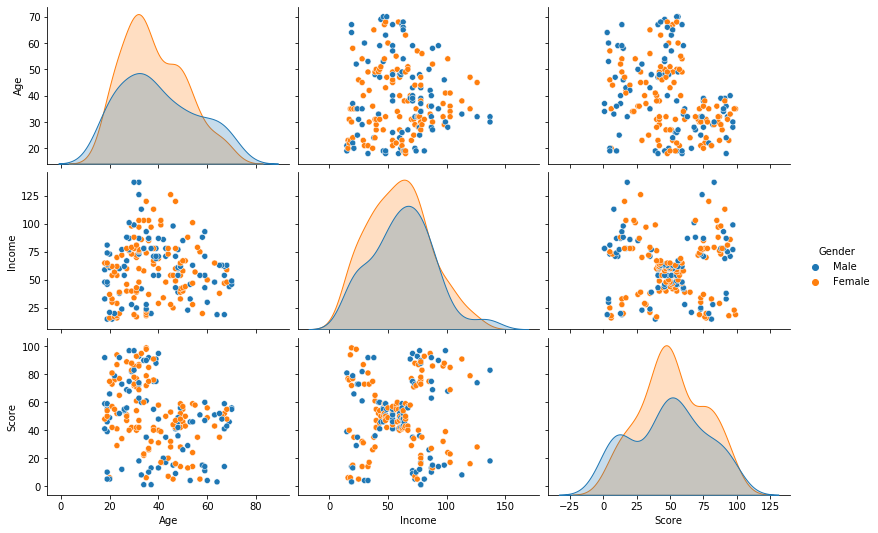

In [11]:
sns.pairplot(df_2, hue ='Gender', aspect =1.5)
plt.show()


In [12]:
X = df_2.drop('Gender', axis =1)
X

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
cluster_nos = 2
aggl_clust = AgglomerativeClustering(n_clusters = cluster_nos, linkage = 'average').fit(X)

In [15]:
X['labels'] = aggl_clust.labels_

In [16]:
X

,Age,Income,Score,labels
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,1
197,32,126,74,0
198,32,137,18,1


In [17]:
s = str(cluster_nos)

Text(0.5, 1.0, 'Agglomerative with Clusters 2')

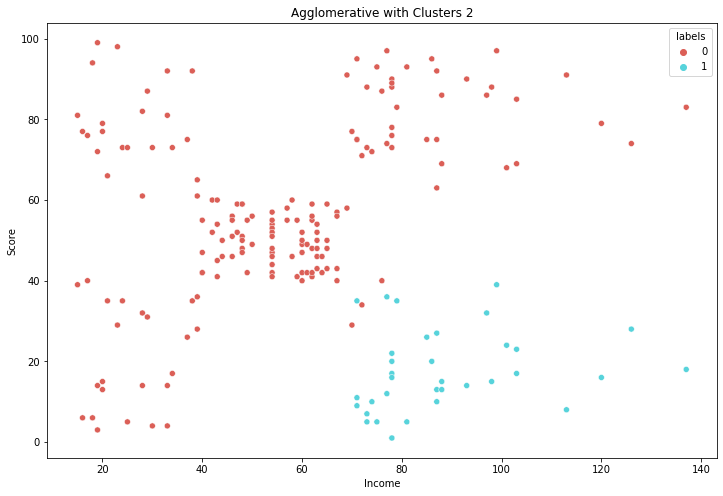

In [18]:
plt.figure(figsize = (12,8))
sns.scatterplot(X['Income'], X['Score'], hue = X['labels'], palette = sns.color_palette('hls', cluster_nos))
plt.title('Agglomerative with Clusters' + " "+s)

## Dendrogram Associated for the Agglomerative Hierarchical Clustering
A distance matrix contains the distance from each point to every other point of a dataset.  We can use the function distance_matrix, which requires two inputs. The distance values are symmetric, with a diagonal of 0's (This is one way of making sure your matix is correct)

In [19]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

In [20]:
dist = distance_matrix(X,X)

In [21]:
print(dist)

[[  0.          42.04759208  33.03028913 ... 117.1110584  124.47891388
  130.15759678]
 [ 42.04759208   0.          75.01333215 ... 111.7631424  137.74977314
  122.34786471]
 [ 33.03028913  75.01333215   0.         ... 129.87686476 122.18837915
  143.77065069]
 ...
 [117.1110584  111.7631424  129.87686476 ...   0.          57.07889277
   14.35270009]
 [124.47891388 137.74977314 122.18837915 ...  57.07889277   0.
   65.03845017]
 [130.15759678 122.34786471 143.77065069 ...  14.35270009  65.03845017
    0.        ]]


Using the linkage class from hierarchy, pass in the parameters:

The distance matix
'complete' for complete linkage

In [26]:
# method = 'single', method = 'average' method = 'complete'
z = hierarchy.linkage(dist, method = 'average')

A Hierarchycal clustering is typically visualized as a dendogram as shown in the followong cell. Each merge is represented by a horizontal line. The y- coordinate of the horizonta line is the similarity of the two clusters that were merged, where cities are viewed as singlton clusters. By moving up from the buttom layer to the top node, a dendogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

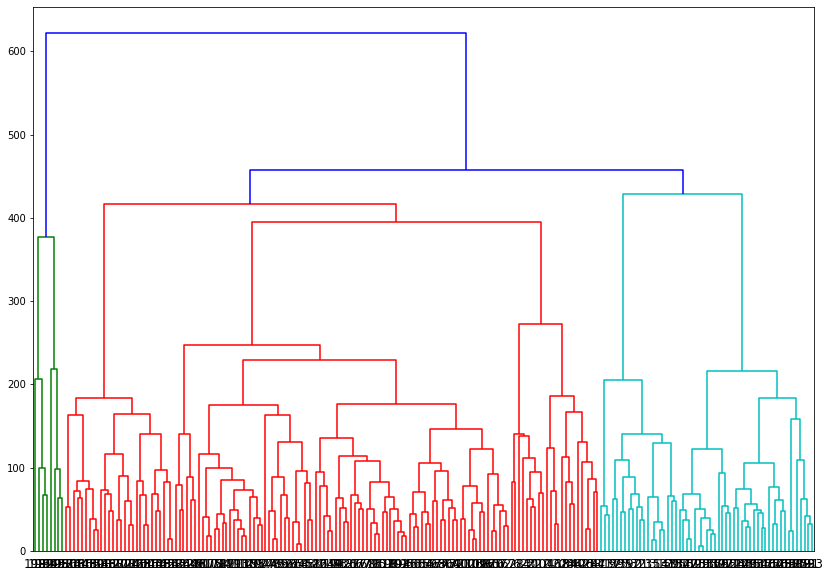

In [25]:
plt.figure(figsize = (14,10))
dedro = hierarchy.dendrogram(z, leaf_rotation = 0, leaf_font_size = 12, orientation = 'top')

In [27]:
z = hierarchy.linkage(dist, method = 'complete')


In [ ]:
plt.figure(figsize = (14,10))
dendro = hierarchy.dendrogram(z, leaf_rotation = 0, leaf_font_size = 1, orientation = 'top')

In [31]:
z = hierarchy.linkage(dist, method = 'single')

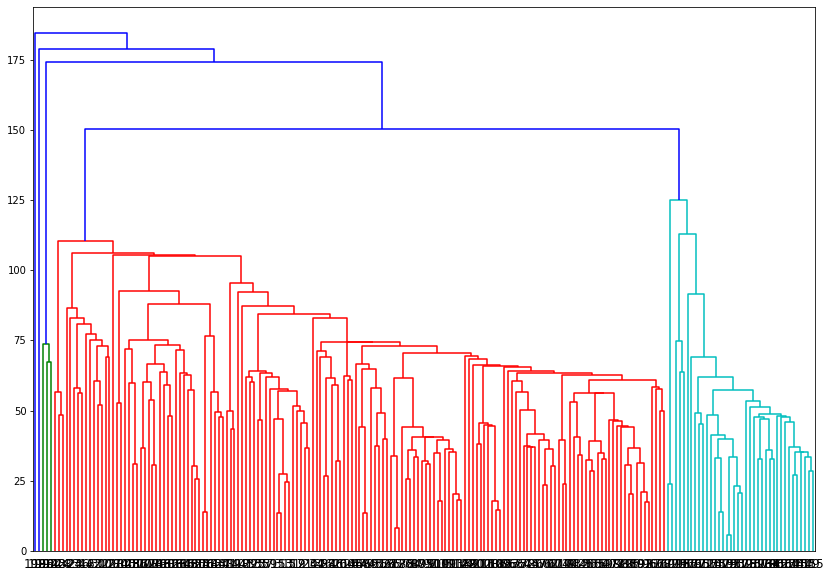

In [35]:
plt.figure(figsize = (14,10))
dendro = hierarchy.dendrogram(z, leaf_rotation = 0, leaf_font_size = 12, orientation = 'top')